# Сборный проект -1. Оценка продаж компьютерных игр с 1980 по 2016 г.г. и прогноз популярности игр в 2017 г

# Описание проекта
Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры и нужно сделать прогноз успешности продаж в следующем году. 
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Есть данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных

•	Name — название игры

•	Platform — платформа

•	Year_of_Release — год выпуска

•	Genre — жанр игры

•	NA_sales — продажи в Северной Америке (миллионы проданных копий)

•	EU_sales — продажи в Европе (миллионы проданных копий)

•	JP_sales — продажи в Японии (миллионы проданных копий)

•	Other_sales — продажи в других странах (миллионы проданных копий)

•	Critic_Score — оценка критиков (максимум 100)

•	User_Score — оценка пользователей (максимум 10)

•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

###  Загрузка данных
Путь к файлу: /datasets/games.csv. 

In [2]:
games = pd.read_csv('/datasets/games.csv', sep = ',')
# выведем общую информацию
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
# Выведем первые 10 строк
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


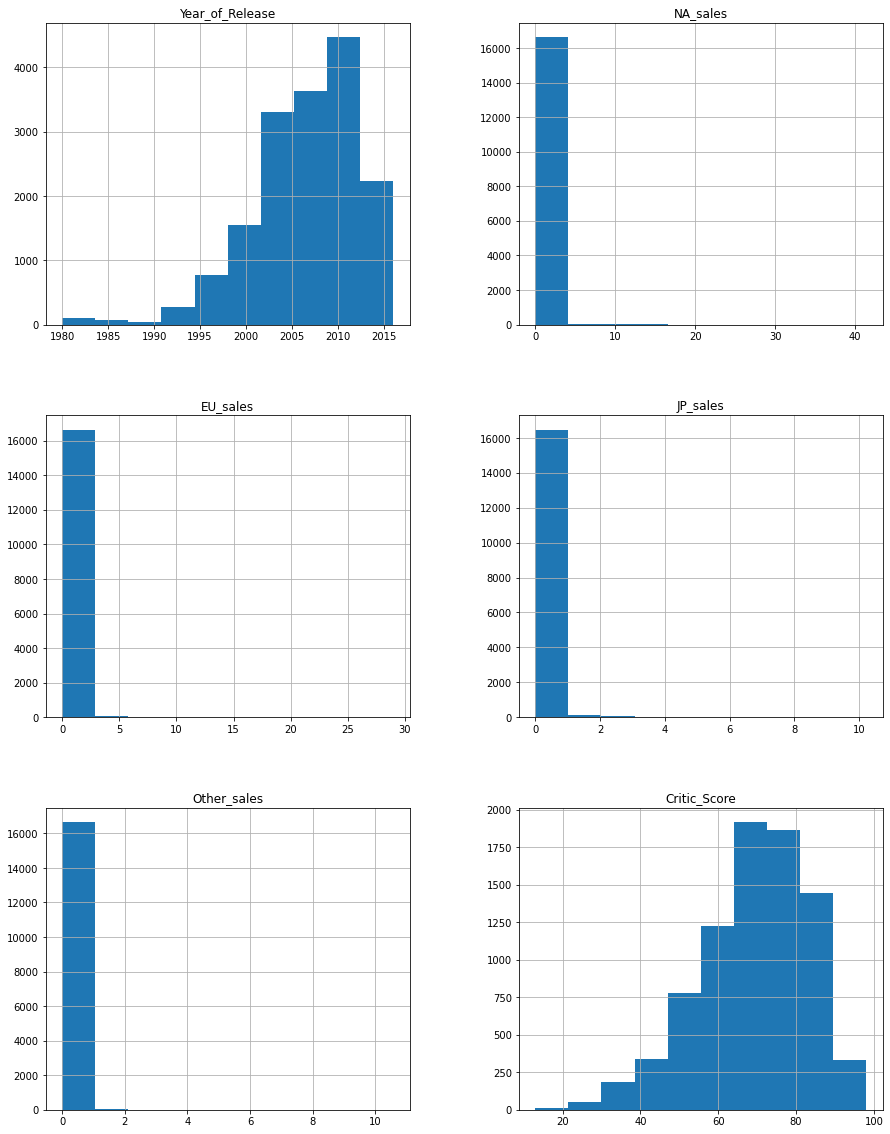

In [4]:
#выведем в виде гистрограмм
games.hist(figsize=(15, 20));

In [5]:
# выведем статистику
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
# Дубликатов нет
games.duplicated().sum()

0

In [7]:
# найдем игры без названия
games[games['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
# удалим строки без названия игр
games.dropna(subset=['Name'], inplace=True)

In [9]:
#запомним количество строк и столбцов
games.shape

(16713, 11)

<div class="alert alert-block alert-info">
<b>🔄Вывод:</b> 

В таблице представлено 16713 записей об играх, продажах и их рейтинг. Данные предоставлены за период с 1980 по 2016 г.г.
При первом визуальном ознакомлении с данными мы видим, что необходимо изменить названия столбцов (привести все названия к нижнем регистру), заменить тип данных (год выпуска и оценки пользователей), а также обработать пропущенные значения в оценках критиков, оценках пользователей и рейтинге ESRB.✔
</div>

### Подготовка данных для анализа
Ход работ:
•	Заменим названия столбцов (с приведением к нижнему регистру);

•	Преобразуем данные в нужные типы. 

•	Обработаем пропуски и при необходимости решим следующие проблемы:
o	Почему заполнили пропуски определённым образом или почему не стали это делать;
o	Встречается аббревиатура 'tbd' в столбце с оценкой пользователей. Разберем, как его обработать;

•	Посчитаем суммарные продажи во всех регионах.

In [10]:
games.columns.tolist()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [11]:
# Замените названия столбцов (приведите к нижнему регистру)
cols = ['game_name',
        'platform',
        'year_of_release',
        'genre',
        'america_sales',
        'europa_sales',
        'japan_sales',
        'other_sales',
        'critic_score',
        'user_score',
        'rating_type']
games.set_axis(cols, axis='columns', inplace=True)
# games.columns = games.columns.str.lower.
games.head()

,game_name,platform,year_of_release,genre,america_sales,europa_sales,japan_sales,other_sales,critic_score,user_score,rating_type
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [12]:
# Выведем все пропуски:
games.isna().sum()

game_name             0
platform              0
year_of_release     269
genre                 0
america_sales         0
europa_sales          0
japan_sales           0
other_sales           0
critic_score       8576
user_score         6699
rating_type        6764
dtype: int64

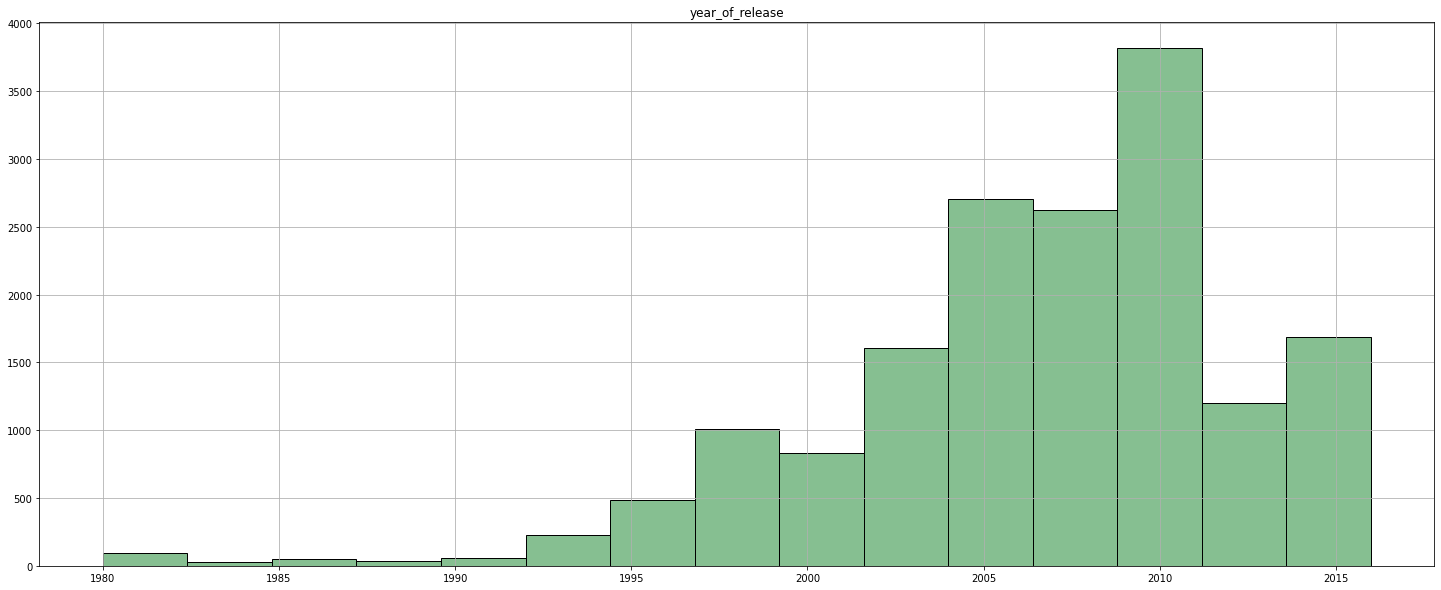

In [13]:
# Преобразуйте данные в нужные типы.

# Заполним отсутствующий год выпуска  2100 годом. 
games['year_of_release'] = games['year_of_release'].fillna(2100)
# преобразуем в целочисленный
games['year_of_release'] = games['year_of_release'].astype(int)
#games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y-%m-%d').dt.year - некорректно работает
games[games['year_of_release']<2030].hist(['year_of_release'],bins=15,figsize=(25, 10),color='#86bf91',edgecolor="black");

#16713 строк

In [14]:
# 269 строк из 16713 строк это 1,6 процента, жалко терять
games[games['year_of_release']==2100].count()

game_name          269
platform           269
year_of_release    269
genre              269
america_sales      269
europa_sales       269
japan_sales        269
other_sales        269
critic_score       154
user_score         175
rating_type        181
dtype: int64

In [15]:
games.head(10)

,game_name,platform,year_of_release,genre,america_sales,europa_sales,japan_sales,other_sales,critic_score,user_score,rating_type
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [16]:
games.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   america_sales    16713 non-null  float64
 5   europa_sales     16713 non-null  float64
 6   japan_sales      16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating_type      9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [17]:
# Заполним отсутствующие critic_score -1 
games['critic_score'] = games['critic_score'].fillna(-1)
games['critic_score'].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [18]:
# Преобразуем в целочисленный
games['critic_score']=games['critic_score'].astype(int)

In [19]:
games.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   america_sales    16713 non-null  float64
 5   europa_sales     16713 non-null  float64
 6   japan_sales      16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       10014 non-null  object 
 10  rating_type      9949 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.5+ MB


In [20]:
# games['user_score']=games['user_score'].astype(int) - не катит, так как есть дробные значения
games['user_score'].unique()
# и есть 'tbd' 

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [21]:
# преобразуем tbd в NaN
games['user_score'] = games['user_score'].replace('tbd', np.NaN).astype('float')

<div class="alert alert-block alert-info">
<b>🔄Замена tbd пропусками</b> 
В столбце 'user_score' кроме числовых значений и пропусков присутствует "tbd". Это аббревиатура от To Be Determined - Подлежит уточнению. Пишется тогда, когда игра имеет недостаточное количество отзывов (менее 4) для подсчета рейтинга пользователей и его публикации. То есть "tbd" является "Nan". ✔
</div>

In [22]:
# Заполним отсутствующие user_score -1 
games['user_score'] = games['user_score'].fillna(-1)

In [23]:
games['user_score'].unique()

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

In [24]:
games.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   america_sales    16713 non-null  float64
 5   europa_sales     16713 non-null  float64
 6   japan_sales      16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating_type      9949 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [25]:
games['rating_type'].unique()
# 6764 пропущенных значений

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [26]:
games['rating_type'].value_counts(dropna=False)

NaN     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating_type, dtype: int64

In [27]:
# Присвоим категории  EC, K-A, RP, AO к большим категориям близкими по значению 

games['rating_type'] = games['rating_type'].replace({'EC':'E', 'K-A':'E', 'RP':'E', 'AO':'M'})

# Пропуски заполним значением 'No rating'

games['rating_type'] = (games['rating_type'].fillna('No rating'))

# Выводим полученный результат количества уникальных совпадений столбца рейтинг

games['rating_type'].value_counts()

No rating    6764
E            4004
T            2961
M            1564
E10+         1420
Name: rating_type, dtype: int64

In [28]:
# Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
#games['total_sales'] = games['america_sales']+ games['europa_sales']+ games['japan_sales']+ games['other_sales']
games['total_sales'] = games[['america_sales', 'europa_sales', 'japan_sales', 'other_sales']].sum(axis=1)
#df['total_sum'] = df[['value_1', 'value_2', 'value_3']].sum(axis=1)

In [29]:
# выведем еще раз статистику
games.describe()

,year_of_release,america_sales,europa_sales,japan_sales,other_sales,critic_score,user_score,total_sales
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000
mean,2007.991384,0.263302,0.145045,0.077625,0.047343,33.064920,2.689888,0.533315
std,13.132369,0.813565,0.503359,0.308871,0.186742,36.299815,4.169887,1.548282
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.060000
50%,2008.000000,0.080000,0.020000,0.000000,0.010000,-1.000000,-1.000000,0.170000
75%,2011.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000,0.470000
max,2100.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


In [30]:
# и случайные строки
games.sample(10)

,game_name,platform,year_of_release,genre,america_sales,europa_sales,japan_sales,other_sales,critic_score,user_score,rating_type,total_sales
4397,Sid Meier's Civilization Revolution,DS,2008,Strategy,0.37,0.03,0.02,0.03,80,7.7,E10+,0.45
423,007: Tomorrow Never Dies,PS,1999,Shooter,1.72,1.33,0.00,0.16,-1,-1.0,No rating,3.21
6560,Rayman DS,DS,2005,Platform,0.21,0.03,0.00,0.02,58,7.6,E,0.26
10546,Alvin and the Chipmunks: Chipwrecked,DS,2011,Misc,0.06,0.03,0.00,0.01,-1,-1.0,E10+,0.10
3360,Littlest Pet Shop: Garden,DS,2008,Simulation,0.31,0.23,0.00,0.06,-1,-1.0,E,0.60
7574,Super Dodge Ball Advance,GBA,2001,Sports,0.14,0.05,0.00,0.00,79,-1.0,E,0.19
13138,Rave Master,GC,2002,Fighting,0.00,0.00,0.05,0.00,60,6.3,T,0.05
12928,Activision Hits: Remixed,PSP,2006,Misc,0.05,0.00,0.00,0.00,75,-1.0,E,0.05
11068,2-in-1 Game Pack: Spider-Man & Spider-Man 2,GBA,2005,Platform,0.06,0.02,0.00,0.00,-1,-1.0,No rating,0.08
10265,Winter Heat,SAT,1996,Sports,0.00,0.00,0.11,0.00,-1,-1.0,No rating,0.11


In [31]:
games.isna().sum()

game_name          0
platform           0
year_of_release    0
genre              0
america_sales      0
europa_sales       0
japan_sales        0
other_sales        0
critic_score       0
user_score         0
rating_type        0
total_sales        0
dtype: int64

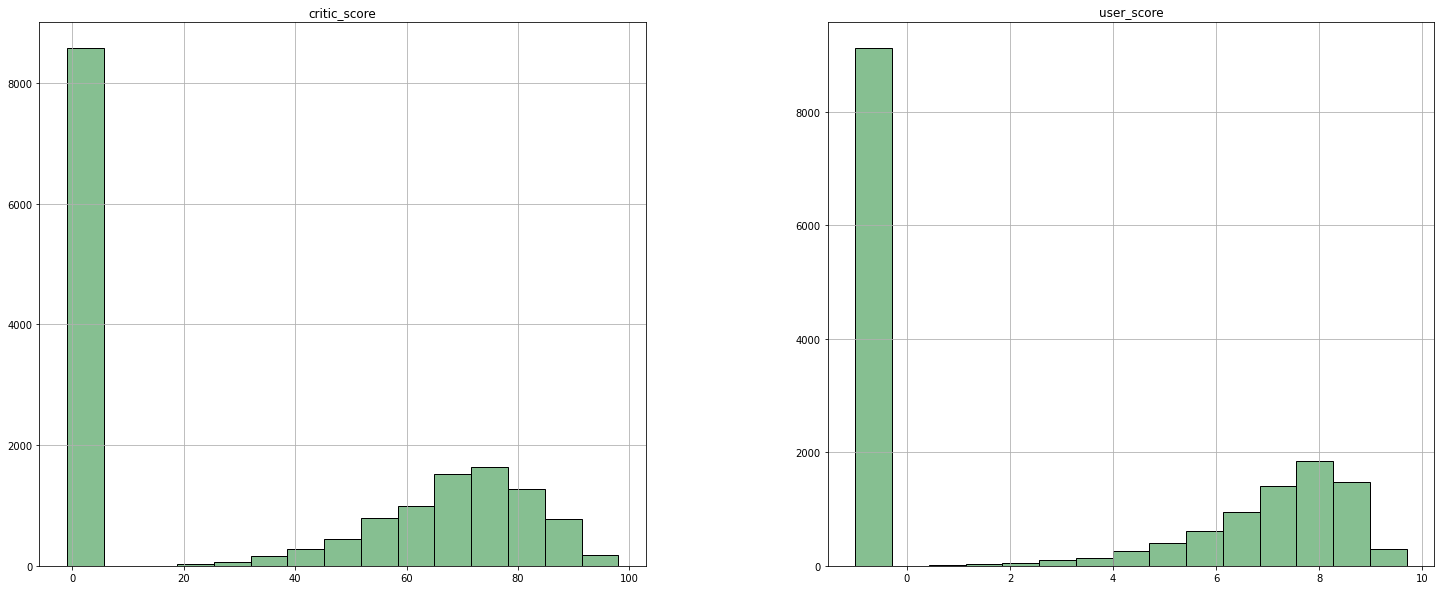

In [32]:
games.hist(['critic_score','user_score'],bins=15,figsize=(25, 10),color='#86bf91',edgecolor="black");

In [33]:
# проверим, нет ли у нас случаев, когда в рамках одной платформы есть повторы названий
games[['game_name', 'platform']].duplicated().sum()

4

In [34]:
# оказывается, есть
# посмотрим на проблемные строки
games[games.groupby(games.game_name+games.platform)['game_name'].transform('count') > 1].sort_values(by='game_name')

,game_name,platform,year_of_release,genre,america_sales,europa_sales,japan_sales,other_sales,critic_score,user_score,rating_type,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.5,E,0.01
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T,1.25
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82,8.5,T,0.08
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43,4.1,E10+,1.17
4127,Sonic the Hedgehog,PS3,2100,Platform,0.00,0.48,0.00,0.00,43,4.1,E10+,0.48


Строки с минимальными продажами типа 0.01, 0.08 можно было бы удалить, но пусть останутся для полноты картины. 

In [35]:
games.reset_index()
games.shape
#16713 строк, 12 столбцов

(16713, 12)

<div class="alert alert-block alert-info">
<b>🔄Вывод о подготовке данных</b> 
Из анализа предобработанных данных можно выделить несколько наблюдений:
    
Пропущенные значения в столбце name  были удалены в виду их небольшого количества, что никак не может повлиять на ход исследования.
    
Пропуски в столбцах critic_score и user_score составляют подавляющее большинство датасета (можно увидеть на гистограммах выше) и их удаление повлияет на результаты исследования, в связи с этим заменили пропуски на индикаторные значения -1. 
    
Аббревиатура 'tbd' в столбце с оценкой пользователей переводится, как "подлежит уточнению", поэтому заменили значение на Nan, чем по сути оно и является.

Столбец rating включал в себя 8 возрастных категорий, 4 из которых содержали малое количество игр, которые в свою очередь были приплюсованы к схожим по себе категориям. Пропуски в этом столбце заменили на значение 'No rating', т.к. их оказалось много.
    
Аномальные значения атрибутов отсутствуют. Пропуски в рейтинговых атрибутах могут быть связаны как с периодом выпуска игр (поскольку данные представлены начиная с 1980 года - для многих игр на тот период систем рейтинговых оценок могло не существовать), так и, например, с небольшим тиражом игр (игры, не получившие широкого распространения, имеют вероятность остаться без оценок/рейтингов).

Что касается пропусков в атрибуте года выпуска, они вероятно связаны с ошибками при получении данных (ошибками в исходных данных). Возможно, для части игр точные данные о годе выпуска просто неизвестны. ✔
</div>

### Исследовательский анализ данных
Ход исследований:

•	Визуализируем, сколько игр выпускалось в разные годы. Отметим важные периоды.

•	Визуализируем, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

•	 Определим актуальный период. Возьмем данные за соответствующий актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год.

•	Данные за предыдущие годы - исключим, если таковые есть.

•	Выберем несколько потенциально прибыльных платформ.

•	Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

•	Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

•	Соотнесем выводы с продажами игр на других платформах.

•	Посмотрим на общее распределение игр по жанрам. 

#### Визуализируем, сколько игр выпускалось в разные годы.

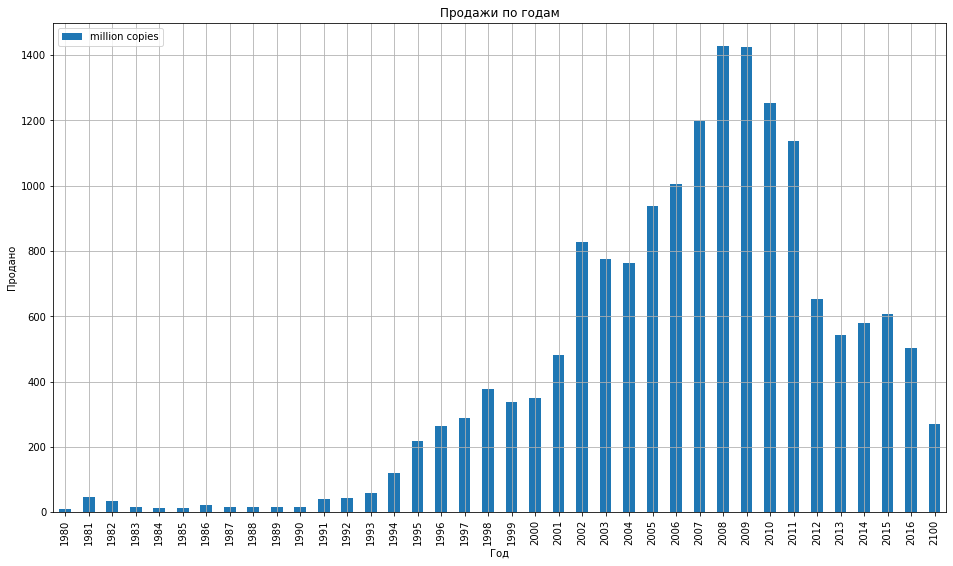

In [36]:
games.pivot_table(index='year_of_release', values='game_name', aggfunc='count')\
.plot.bar(xlabel='year of release', figsize=( 16 , 9 ), grid = True)
plt.legend(['million copies'], loc='upper left')
plt.title('Продажи по годам')
plt.xlabel('Год')
plt.ylabel('Продано')
plt.show()

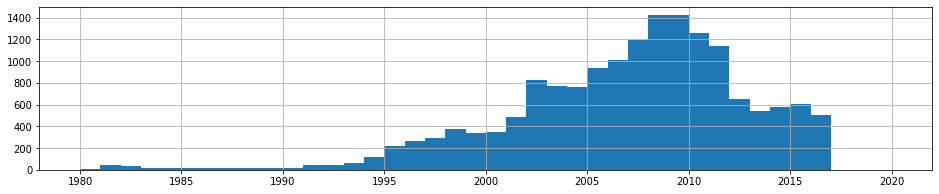

In [37]:
# гистограмма
games['year_of_release'].hist(bins = 40, figsize = (16,3), range = (1980,2020))
plt.ylim(0, 1500);

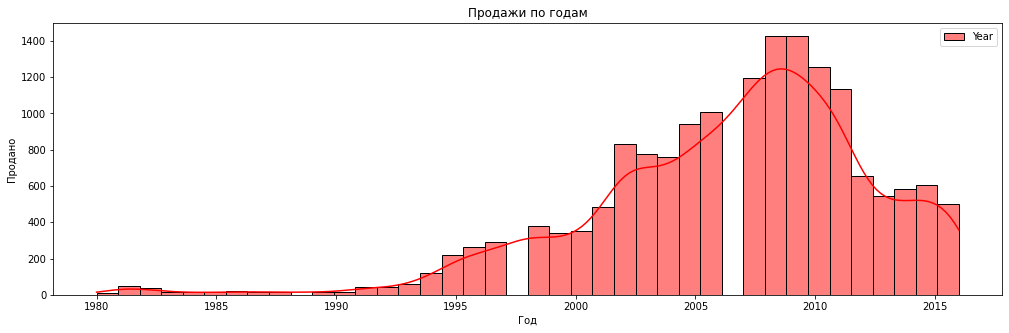

In [38]:
# гистограмма с линией
plt.figure(figsize=(17,5))
sns.histplot(
    games[games['year_of_release'] != 2100].loc[
        (games['year_of_release'] != '2100'),
        'year_of_release'
    ].astype(float), color='red', label='Year', kde=True, bins=40)
plt.title('Продажи по годам')
plt.xlabel('Год')
plt.ylabel('Продано')
plt.legend();

Появились в 80-ых, затем было долго плато — мощностей не хватало, а на текстовых квестах много не заработаешь. С 95-года росли компьютерные мощности, соответственно график релизов тоже рос. С 2010 года спад, насыщение рынка, переход на мобильные платформы.

In [39]:
# Пробелы в гистограмме с линией насторожили, что данных мало в определенных годах
games['year_of_release'].sort_values().unique()
#games['year_of_release'].value_counts().to_frame()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2100])

In [40]:
games['year_of_release'].value_counts().to_frame()

,year_of_release
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775
2004,762


In [41]:
games.groupby('year_of_release').agg({'game_name': 'count'}).sort_values('year_of_release', ascending=False)

,game_name
year_of_release,
2100,269
2016,502
2015,606
2014,581
2013,544
2012,653
2011,1136
2010,1255
2009,1426


#### Визуализируем, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

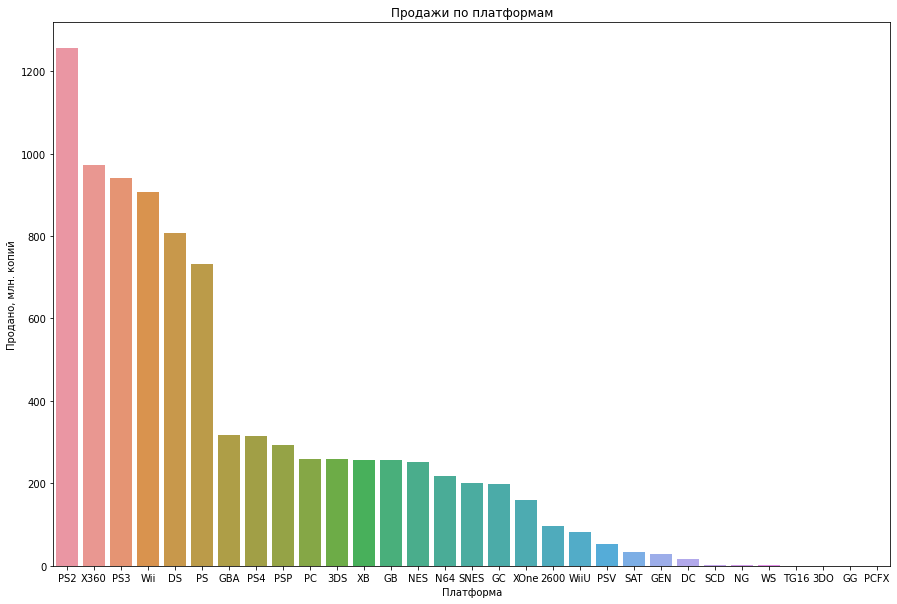

In [43]:
#sns.set_style('whitegrid')
plt.figure(figsize=(15, 10))
top = games.pivot_table(
    index = 'platform',values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False
)
sns.barplot(x = top.index, y = top['total_sales'])
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продано, млн. копий')
#plt.legend();
print()

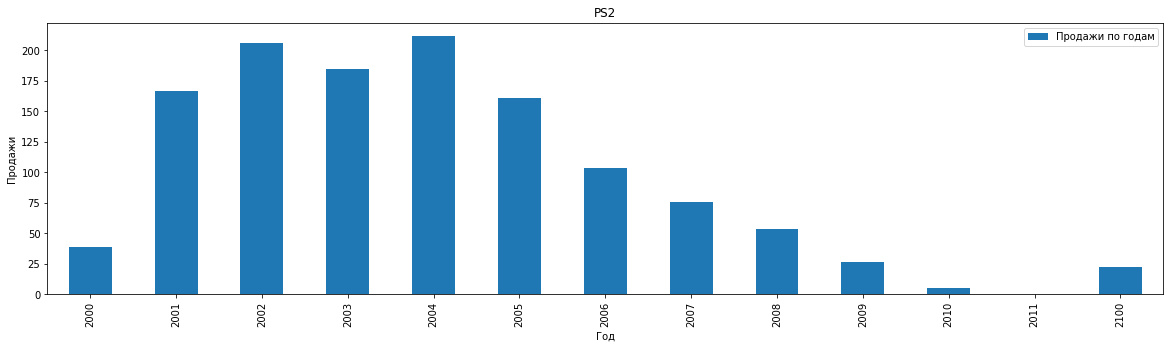

In [44]:
games[games['platform'] == 'PS2'].pivot_table(index = 'year_of_release', 
                                                 values = 'total_sales', 
                                                 aggfunc = 'sum').plot(kind = 'bar', figsize = (20,5));

plt.title('PS2')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.legend(["Продажи по годам"]);

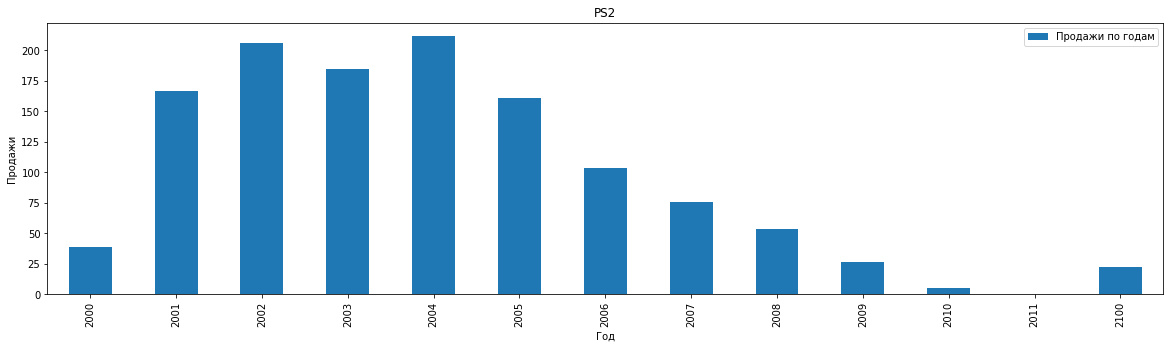

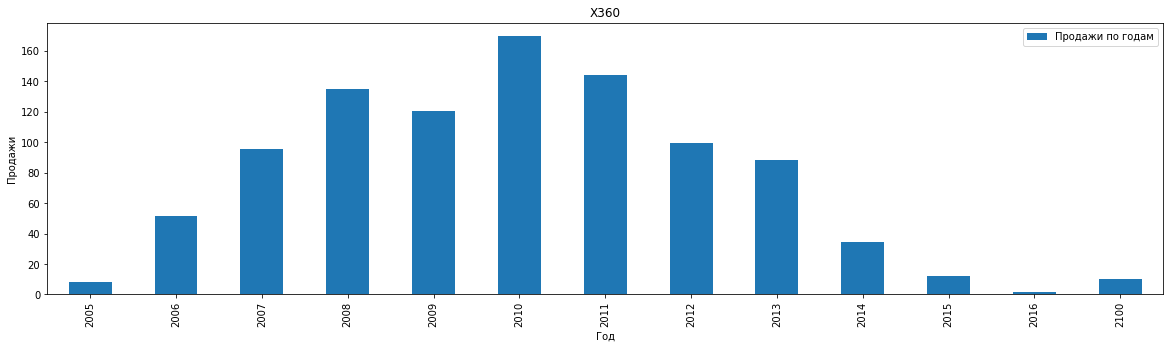

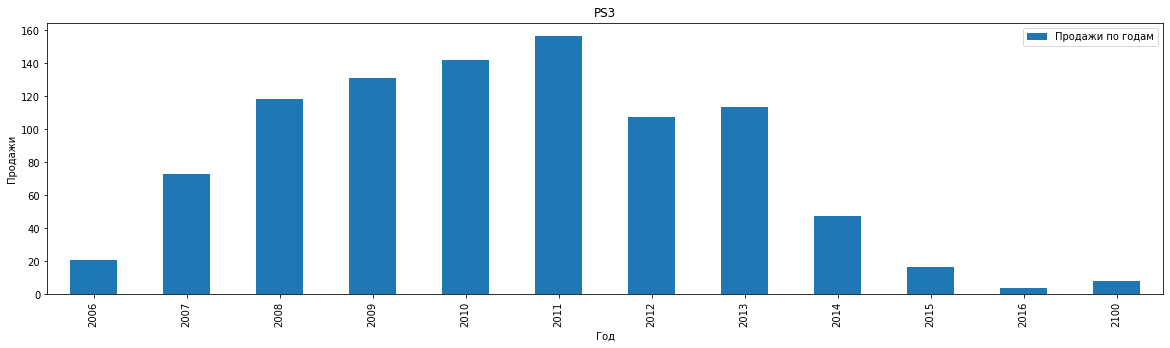

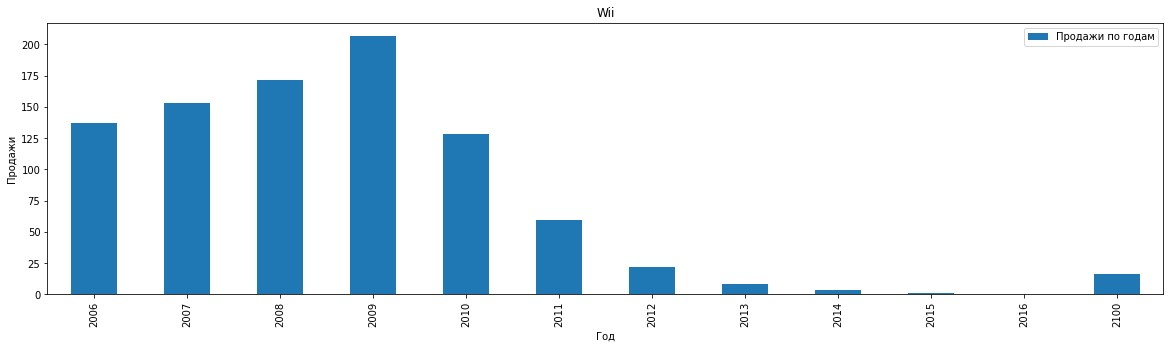

In [45]:
# Вывод для топ-4 
for platform in (top.head(4).reset_index())['platform'].unique():
    games[games['platform'] == platform].pivot_table(index = 'year_of_release', 
                                                 values = 'total_sales', 
                                                 aggfunc = 'sum').plot(kind = 'bar', figsize = (20,5))

    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Продажи')
    plt.legend(["Продажи по годам"]);

Наблюдение: В течении 3-5 лет идет рост продаж, потом спад. Исчезают за 4-6 лет. 

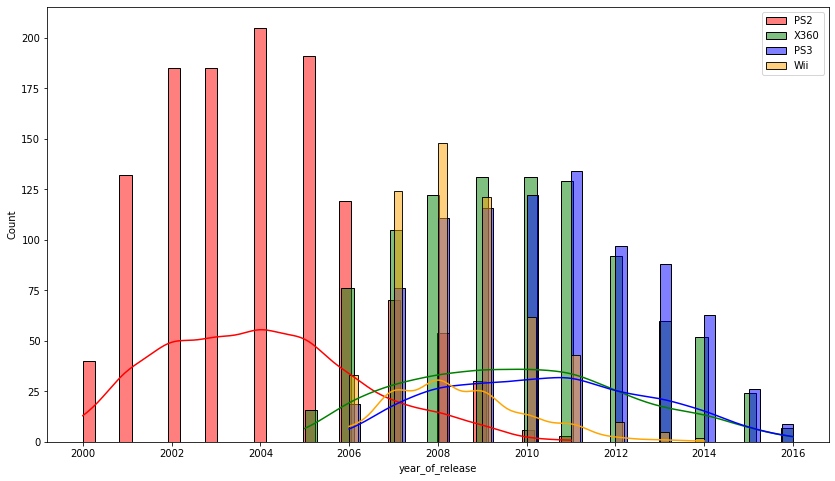

In [46]:
# Вывод топ-4 на одном графике
plt.figure(figsize=(14,8))
sns.histplot(
    games.loc[
        (games['platform'] == 'PS2')
        & (games['year_of_release'] != 2100)
        #& ~games['user_score'].isna() 
        & (games['user_score'] != -1),
        'year_of_release'
    ].astype(float), color='red', label='PS2', kde=True, bins=40)

sns.histplot(games.loc[    
    (games['platform'] == 'X360') 
    & (games['year_of_release'] != 2100)
    #& ~games['user_score'].isna() 
    & (games['user_score'] != -1),
    'year_of_release'
].astype(float), color='green', label='X360', kde=True, bins=40)

sns.histplot(games.loc[    
    (games['platform'] == 'PS3') 
    & (games['year_of_release'] != 2100)
    #& ~games['user_score'].isna() 
    & (games['user_score'] != -1),
    'year_of_release'
].astype(float), color='blue', label='PS3', kde=True, bins=40)

sns.histplot(games.loc[    
    (games['platform'] == 'Wii') 
    & (games['year_of_release'] != 2100)
    #& ~games['user_score'].isna() 
    & (games['user_score'] != -1),
    'year_of_release'
].astype(float), color='orange', label='Wii', kde=True, bins=40)

plt.legend();

Так как нужно предсказать, какие игры будут популярными в 2017 г и средний срок роста продаж ТОП-4 игр - 4 года, то 
можно определить актуальный период для наших исследований с 2013 г. 

#### Определим актуальный период. Возьмем данные за соответствующий актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год.

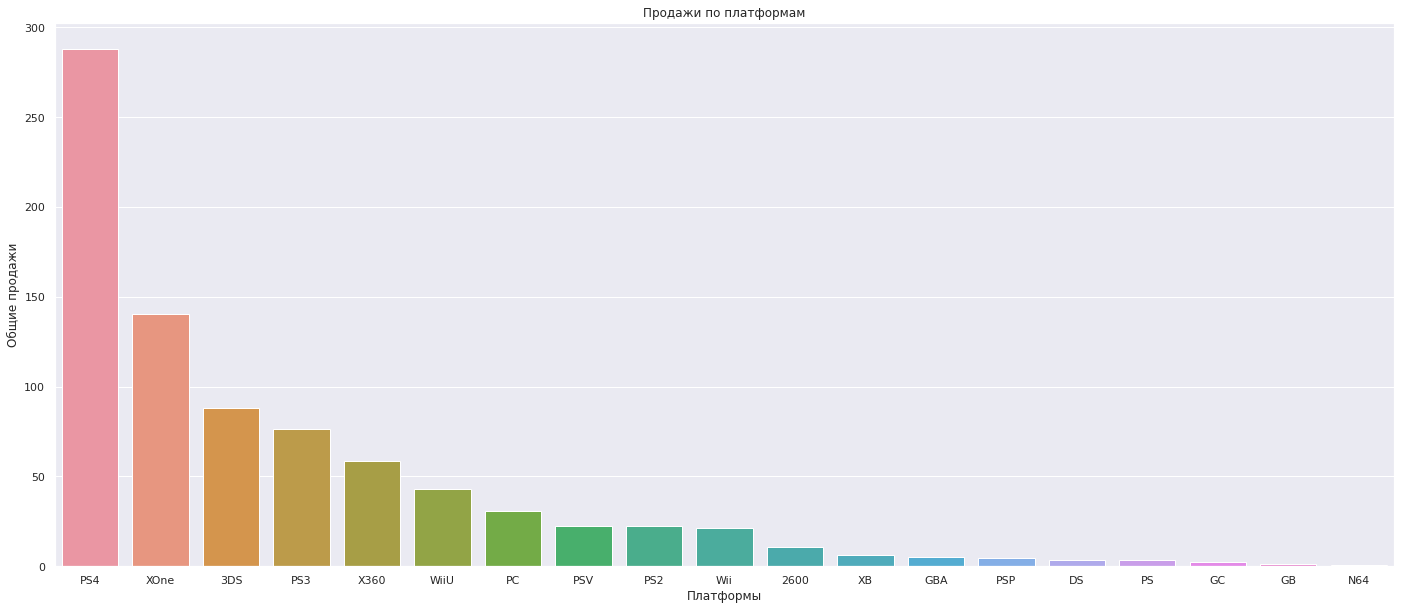

In [47]:
# Выберем актуальный период и проанализируем топовые платформы
profit_consoles = games.query('year_of_release > 2013').pivot_table(index = ['platform'], 
                                                values = 'total_sales', 
                                                aggfunc = 'sum').reset_index().sort_values(by = 'total_sales',
                                                                                           ascending = False)

plt.figure(figsize=(24, 10))
sns.set(style="darkgrid")
sns.barplot(x = profit_consoles['platform'], y = profit_consoles['total_sales']).set(title = 'Продажи по платформам',
                                                                                     xlabel = 'Платформы', 
                                                                                     ylabel = 'Общие продажи');

#### Исключим в работе данные за предыдущие годы

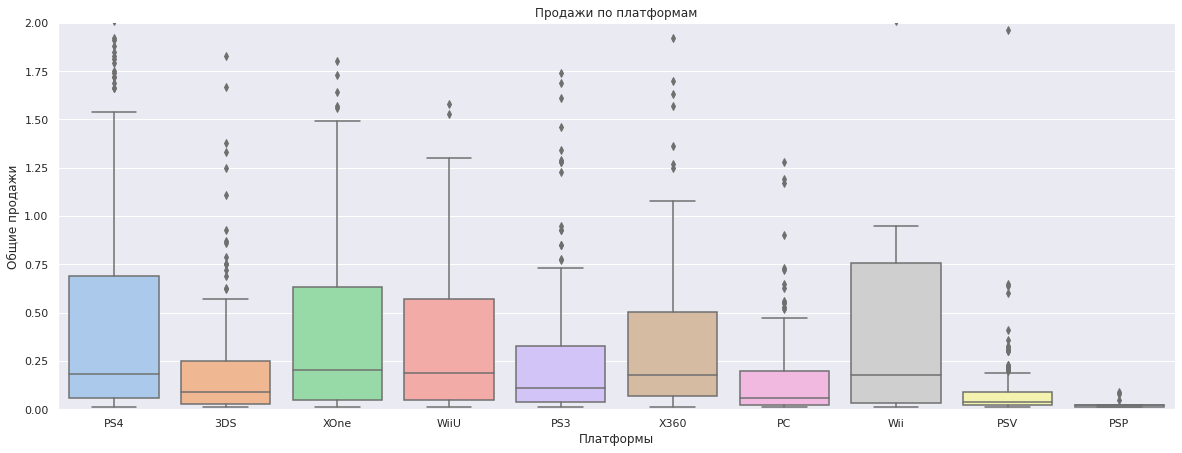

In [48]:
# Создадим переменную с актуальной датой и построим усатые диаграммы

games_2013 = games.query('2020 > year_of_release > 2013') # and 'year_of_release < 2020')

sns.catplot(x="platform", 
            y='total_sales', 
            kind="box", 
            data=games_2013, 
            orient='v', 
            height=6, 
            aspect=2.7, 
            palette='pastel').set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи');

plot = plt.ylim(0, 2)

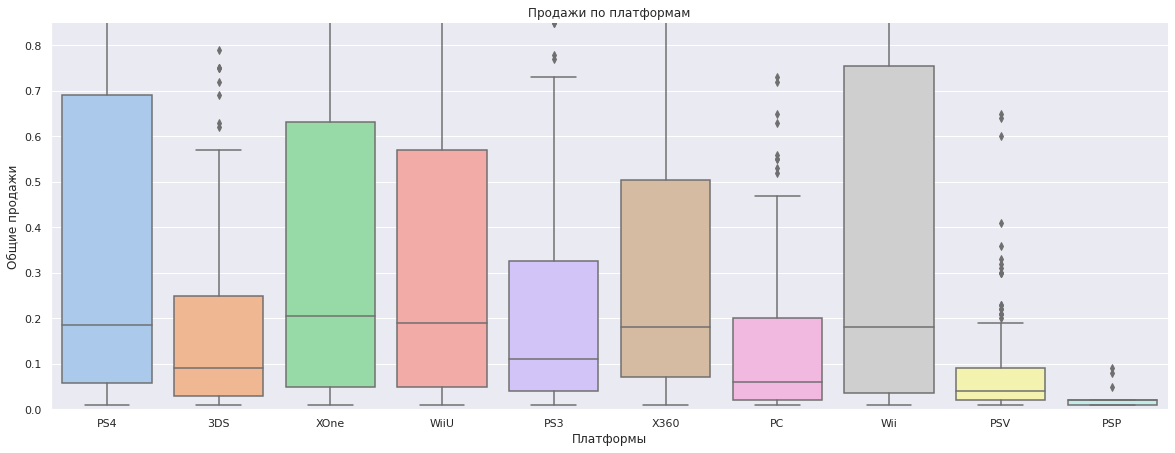

In [49]:
sns.catplot(x="platform", 
            y='total_sales', 
            kind="box", 
            data=games_2013, 
            orient='v', 
            height=6, 
            aspect=2.7, 
            palette='pastel').set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи');

plot = plt.ylim(0, 0.85)

In [50]:
games_2013.describe()

,year_of_release,america_sales,europa_sales,japan_sales,other_sales,critic_score,user_score,total_sales
count,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000
mean,2014.953227,0.168182,0.160261,0.055115,0.048324,30.162818,3.008111,0.431883
std,0.799624,0.446134,0.466846,0.211513,0.141790,37.114050,3.978406,1.056109
min,2014.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.030000
50%,2015.000000,0.020000,0.020000,0.010000,0.010000,-1.000000,3.400000,0.100000
75%,2016.000000,0.120000,0.120000,0.040000,0.040000,71.000000,7.100000,0.350000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.300000,14.630000


<div class="alert alert-block alert-info">
<b>🔄 Промежуточный вывод:</b> 
    
В период 2013-2016 гг. по всем платформам снижается глобальная выручка
По продажам за последние 4 года лидируют: ps3, x360, 3ds, xone, pc.

Вывод: Продажи на популярных платформах схожи. Медианные значения продаж у четырех X360, PS4, Wii находятся близко к уровню 0,2, а в других 4 к уровню 0,1. На платформах 3DS,DS и PSP большая часть проданых игр лежит до значения в 0,5-0,6, на платформах PS4, Wii и PS2 до 0,85-1, а в лидерах X360 и в PS4.✔
</div>

#### Выберем несколько потенциально прибыльных платформ. 

In [51]:
# Лидеры продаж за последние 3 года
games_2013.pivot_table(index='platform', values='total_sales', aggfunc='sum').nlargest(4, 'total_sales')

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18


По результатам построения графика «ящик с усами» по глобальным продажам игр в разбивке по платформам и последующего анализа лидерами продаж стали новые консоли

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


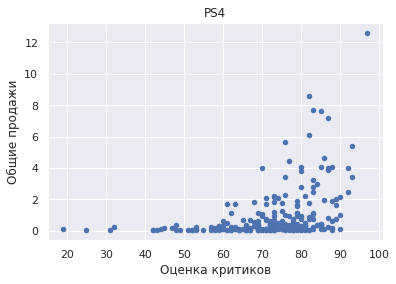

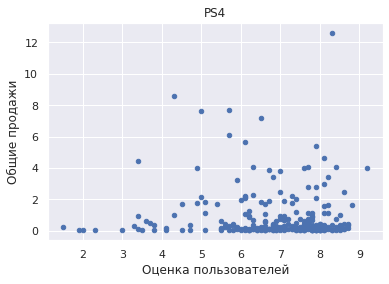

In [52]:
# Влияние оценок между отзывами пользователей и оценкой критиков к объему продаж на основе данных одной популярной платформы
ps4 = games_2013.query('platform == "PS4"')

ps4[ps4['critic_score'] != -1].plot(kind='scatter', x='critic_score', y='total_sales').set(title = 'PS4',
                                                                                           xlabel = 'Оценка критиков',
                                                                                           ylabel = 'Общие продажи');

ps4[ps4['user_score'] != -1].plot(kind='scatter', x='user_score', y='total_sales').set(title = 'PS4',
                                                                                           xlabel = 'Оценка пользователей',
                                                                                           ylabel = 'Общие продажи');

In [53]:
# Коэффициент корреляции между отзывами пользователей и оценкой критиков к объему продаж
print(ps4[(ps4['critic_score'] != -1) 
                        & (ps4['user_score'] != -1)]
                       [['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

critic_score    0.401903
user_score     -0.043186
total_sales     1.000000
Name: total_sales, dtype: float64


Оценки критиков демонстрируют слабую линейную корреляцию с общими продажами. Оценки пользователей корреляции с продажами не имеют.

#### Соотнесем выводы с продажами игр на других платформах. 


PS3:
Коэффициент корреляции user_score и total_sales: 0.1588014557729272
Коэффициент корреляции critic_score и total_sales: 0.44657460493190704

XOne:
Коэффициент корреляции user_score и total_sales: -0.10766379917619384
Коэффициент корреляции critic_score и total_sales: 0.42211185105557647

3DS:
Коэффициент корреляции user_score и total_sales: 0.31497411412966314
Коэффициент корреляции critic_score и total_sales: 0.28468579095782925

X360:
Коэффициент корреляции user_score и total_sales: 0.3006639565947733
Коэффициент корреляции critic_score и total_sales: 0.5257228356581523

WiiU:
Коэффициент корреляции user_score и total_sales: 0.4022937957335921
Коэффициент корреляции critic_score и total_sales: 0.3756402218389979

PC:
Коэффициент корреляции user_score и total_sales: -0.08418332918251578
Коэффициент корреляции critic_score и total_sales: 0.17206091490145103


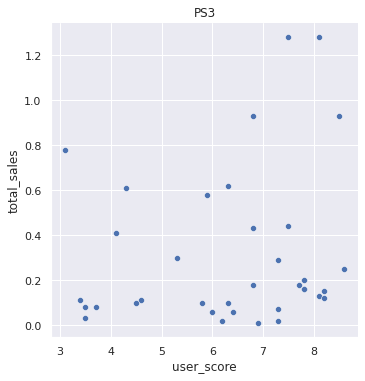

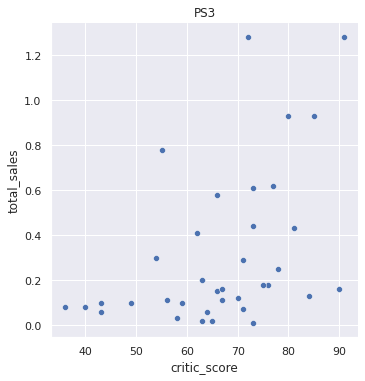

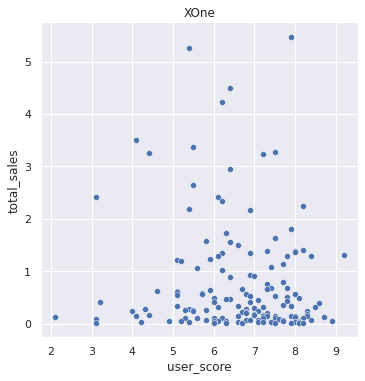

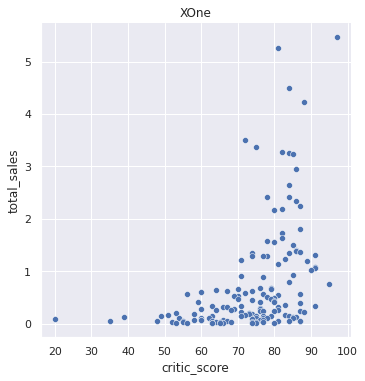

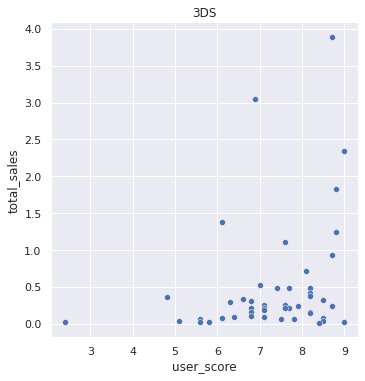

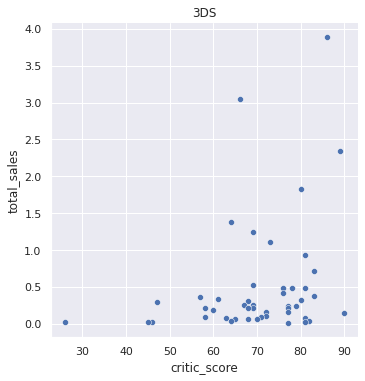

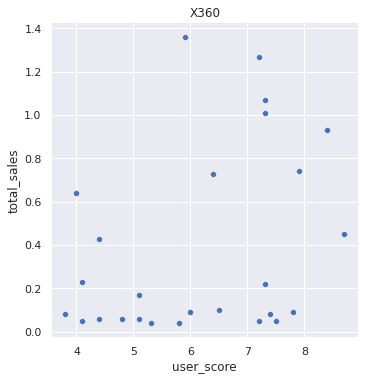

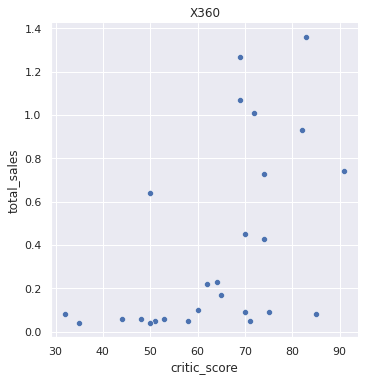

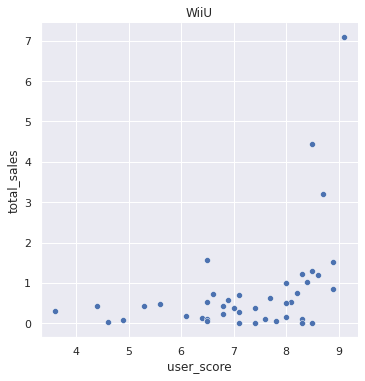

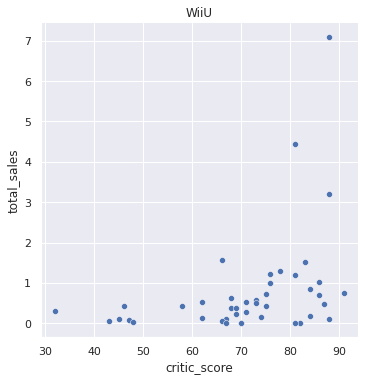

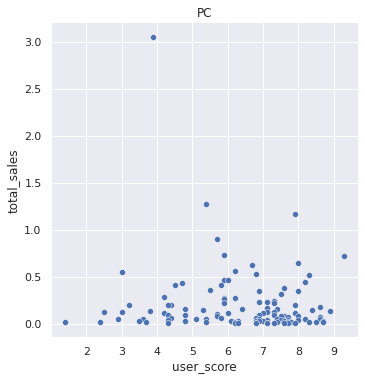

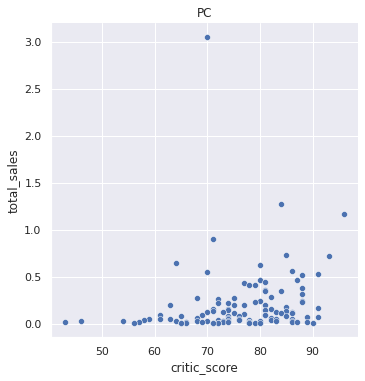

In [54]:
# Было
for platform in ['PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC']:
    print('\n{0}:'.format(platform))
    for column in ['user_score', 'critic_score']:
        temp = games_2013.query('platform == @platform and user_score >= 0 and critic_score >= 0')
        print('Коэффициент корреляции {0} и total_sales: {1}'.\
              format(column, round(temp[column]).corr(temp['total_sales']), 2))
        sns.relplot(x=column, y='total_sales', data=temp)
        _ = plt.title(platform)


PS3:
Коэффициент корреляции user_score и total_sales: -0.17228758175099385

XOne:
Коэффициент корреляции user_score и total_sales: -0.08543592132526273

3DS:
Коэффициент корреляции user_score и total_sales: 0.23571765052126906

X360:
Коэффициент корреляции user_score и total_sales: -0.1299645363948307

WiiU:
Коэффициент корреляции user_score и total_sales: 0.3973440342180167

PC:
Коэффициент корреляции user_score и total_sales: -0.06568042608780653


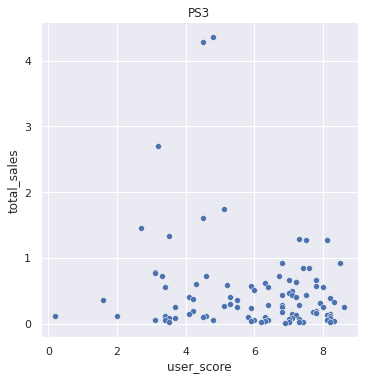

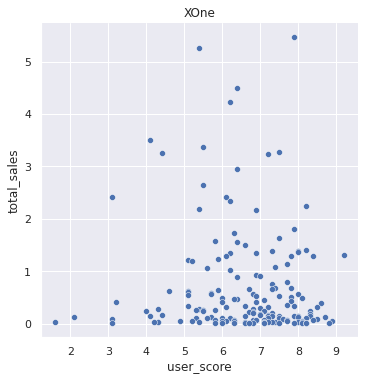

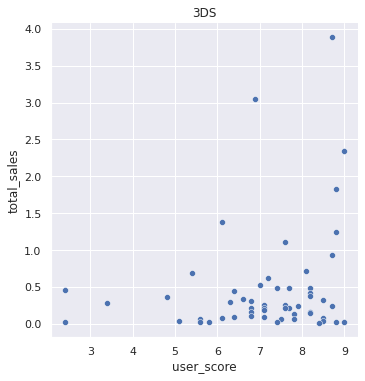

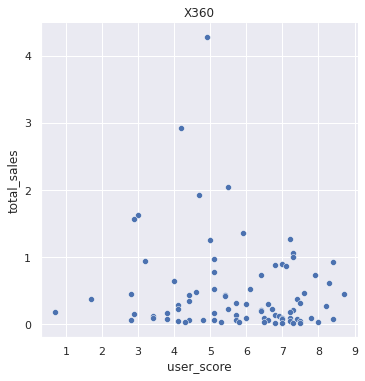

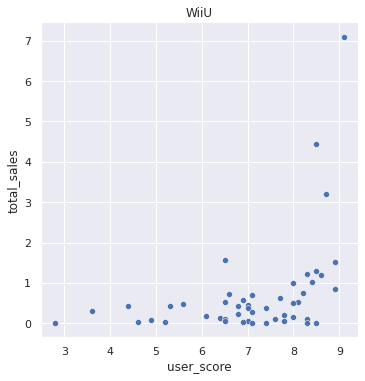

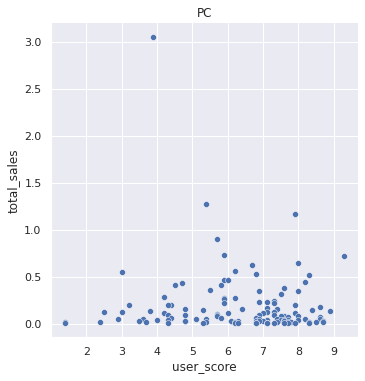

In [55]:
# Исправил для 'user_score'
for platform in ['PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC']:
    print('\n{0}:'.format(platform))
    for column in ['user_score']:
        temp = games_2013.query('platform == @platform and user_score >= 0')
        print('Коэффициент корреляции {0} и total_sales: {1}'.\
              format(column, round(temp[column]).corr(temp['total_sales']), 2))
        sns.relplot(x=column, y='total_sales', data=temp)
        _ = plt.title(platform)


PS3:
Коэффициент корреляции critic_score и total_sales: 0.44657460493190704

XOne:
Коэффициент корреляции critic_score и total_sales: 0.42867694370333226

3DS:
Коэффициент корреляции critic_score и total_sales: 0.314117492869051

X360:
Коэффициент корреляции critic_score и total_sales: 0.5257228356581523

WiiU:
Коэффициент корреляции critic_score и total_sales: 0.370201412480884

PC:
Коэффициент корреляции critic_score и total_sales: 0.17463413769350036


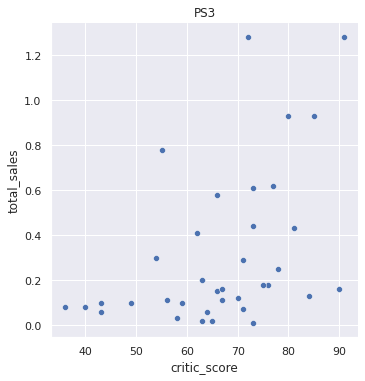

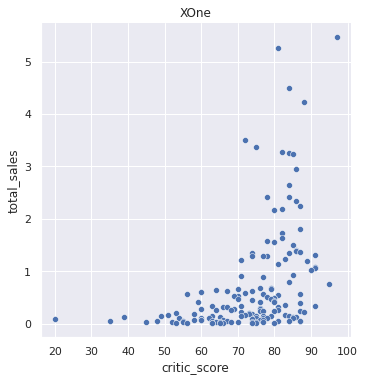

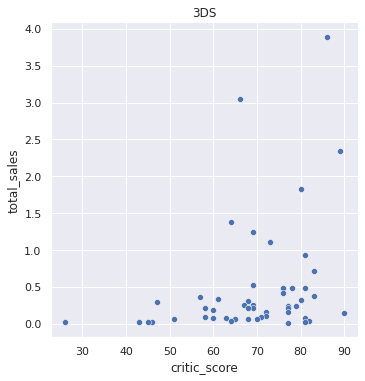

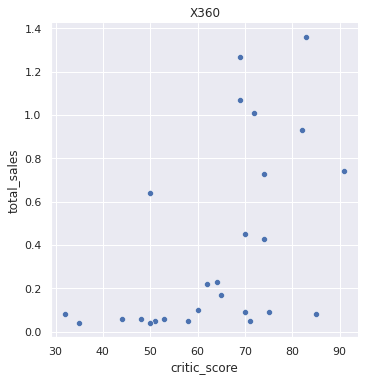

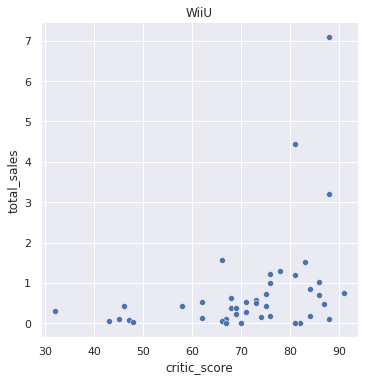

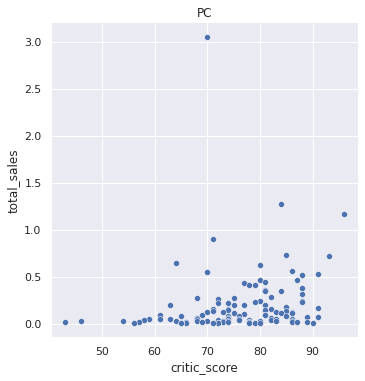

In [56]:
# Исправил для 'critic_score'
for platform in ['PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC']:
    print('\n{0}:'.format(platform))
    for column in ['critic_score']:
        temp = games_2013.query('platform == @platform and critic_score >= 0')
        print('Коэффициент корреляции {0} и total_sales: {1}'.\
              format(column, round(temp[column]).corr(temp['total_sales']), 2))
        sns.relplot(x=column, y='total_sales', data=temp)
        _ = plt.title(platform)

In [57]:
# код ревьюера

print(games_2013.query('platform == "XOne" and user_score >= 0 and critic_score >= 0').shape[0])
print(games_2013.query('platform == "XOne" and user_score >= 0').shape[0])
print(games_2013.query('platform == "XOne" and critic_score >= 0').shape[0])

151
165
155


<div class="alert alert-block alert-info">
<b>🔄</b> 
 вывод отдельно по оценкам критиков и по оценкам пользователей✔
    
Выводы: Взаимосвязи между отзывами пользователей и продажами и взаимосвязь между отзывами критиков и продажами существует, однако не слишком большая;

Взаимосязь между отзывами критиков и отзывами пользователей существует, чуть больше, чем между отзывами критиков и продажами.
По диаграммам рассеяния видим, что чем выше оценки критиков, тем выше продажи игр на обоих платформах и можно утверждать, что высокие оценки критиками приводят к высоким продажам игр, а при покупке игры пользователи больше доверяют критикам.

</div>

#### Посмотрим на общее распределение игр по жанрам. 
Ответим на вопросы: Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

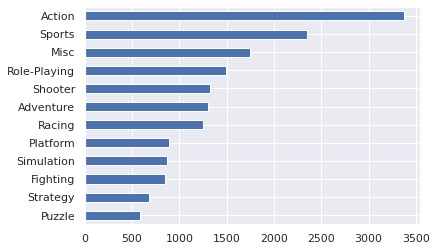

In [58]:
# посмотрим на распределение значений в целом, для сравнения
games.genre.value_counts().sort_values().plot(kind='barh')
plt.show()

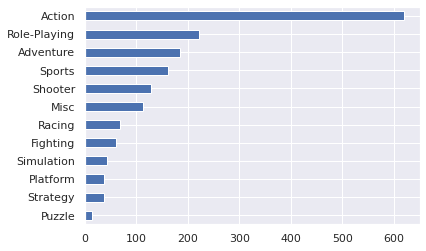

In [59]:
# выведем общее распределение игр по жанрам с 2013 г. 
games_2013.genre.value_counts().sort_values().plot(kind='barh')
plt.show()

In [60]:
genre_sales = games_2013.pivot_table(index='genre', values='total_sales', aggfunc='mean').sort_values('total_sales',
                                                                                                      ascending=False)
genre_sales.index.names = ['Жанр']
genre_sales.columns = ['Общие продажи']
genre_sales

,Общие продажи
Жанр,
Shooter,1.335469
Sports,0.680000
Platform,0.476053
Fighting,0.470333
Role-Playing,0.459005
Racing,0.398841
Misc,0.332301
Action,0.322068
Simulation,0.298409


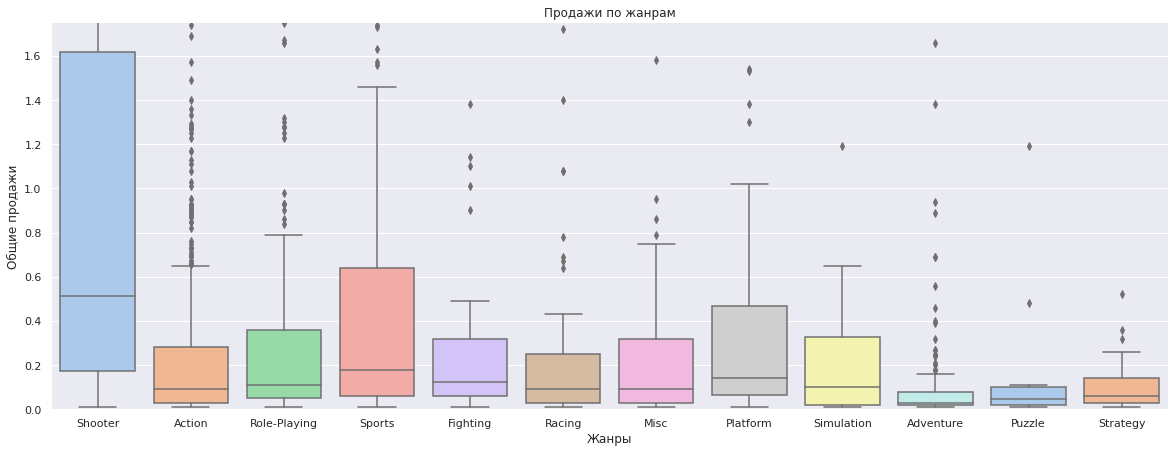

In [61]:
sns.catplot(x="genre", 
            y='total_sales', 
            kind="box", 
            data=games_2013, 
            orient='v', 
            height=6, 
            aspect=2.7, 
            palette='pastel').set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи');

plot = plt.ylim(0, 1.75)

In [62]:
# Топ 10 игр по продажам за все время

top_games = games.pivot_table(index=['game_name', 'genre'], values='total_sales',
                           aggfunc='sum').nlargest(10, 'total_sales').round()
top_games.index.names = ['Название','Жанр']
top_games.columns = ['Общие продажи']
top_games

,,Общие продажи
Название,Жанр,
Wii Sports,Sports,83.0
Grand Theft Auto V,Action,57.0
Super Mario Bros.,Platform,45.0
Tetris,Puzzle,36.0
Mario Kart Wii,Racing,36.0
Wii Sports Resort,Sports,33.0
Pokemon Red/Pokemon Blue,Role-Playing,31.0
Call of Duty: Black Ops,Shooter,31.0
Call of Duty: Modern Warfare 3,Shooter,31.0


In [63]:
# Топ 10 игр по продажам c 2013 г. 

top_games = games_2013.pivot_table(index=['game_name', 'genre'], values='total_sales',
                           aggfunc='sum').nlargest(10, 'total_sales').round()
top_games.index.names = ['Название','Жанр']
top_games.columns = ['Общие продажи']
top_games

,,Общие продажи
Название,Жанр,
Call of Duty: Black Ops 3,Shooter,26.0
Call of Duty: Advanced Warfare,Shooter,22.0
Grand Theft Auto V,Action,19.0
FIFA 15,Sports,17.0
FIFA 16,Sports,16.0
Minecraft,Misc,15.0
Fallout 4,Role-Playing,13.0
Destiny,Shooter,13.0
Super Smash Bros. for Wii U and 3DS,Fighting,12.0


## выводы
Средний цикл жизни игровой приставки около 10 лет.
Оценки пользователей не влияют на объемы продаж в отличие от оценок критиков.
Самыми популярными жанрами компьютерных игр в глобальном плане можно поделить между Sports, Action и Super Mario в виду того, что эта игра была доступна чуть ли на всех платформах. 

В актуальном времени геймеры предпочитают больше Shooter, Action и Sports. Именно на эти жанры стоит обратить внимание при продвижении игровых платформ. Наименее продаваемыми являются жанры Pazzle, Adventure, Strategy . По всем жанрам также много выбросов. В каждом жанре есть популярные игры с уровнем продаж на порядки выше средних значений.

### Портрет пользователя каждого региона
Определим для пользователя каждого региона (NA, EU, JP):

•	Самые популярные платформы (топ-5). Опишите различия в долях продаж.

•	Самые популярные жанры (топ-5). Поясните разницу.

•	Влияет ли рейтинг ESRB на продажи в отдельном регионе?


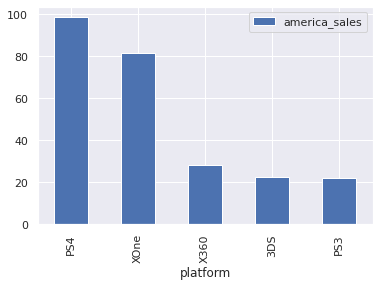

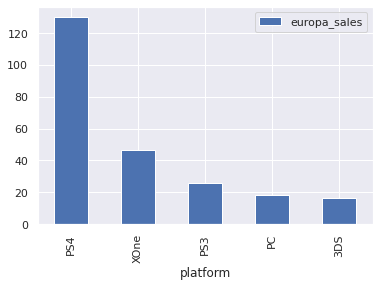

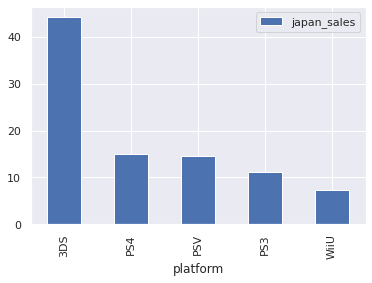

In [65]:
# Определите для пользователя каждого региона (NA, EU, JP):
# Самые популярные платформы (топ-5). Опишите различия в долях продаж.
# america_sales europa_sales japan_sales
games_2013.groupby(by='platform').agg({'america_sales':'sum'}).sort_values(by='america_sales', ascending=False)\
.head(5).plot(kind='bar')
games_2013.groupby(by='platform').agg({'europa_sales':'sum'}).sort_values(by='europa_sales', ascending=False)\
.head(5).plot(kind='bar')
games_2013.groupby(by='platform').agg({'japan_sales':'sum'}).sort_values(by='japan_sales', ascending=False)\
.head(5).plot(kind='bar');

Доля PS4 В Америке и в Европе больше, чем остальных приставок. В Японии больше доля приставки 3DS. 

In [66]:
# Определим для пользователя каждого региона (NA, EU, JP):
# Самые популярные жанры (топ-5). Поясните разницу.

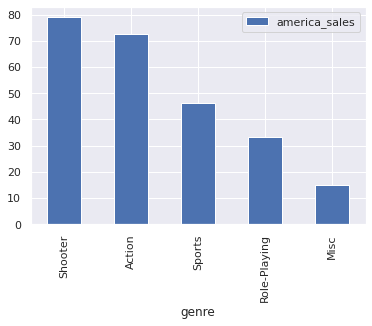

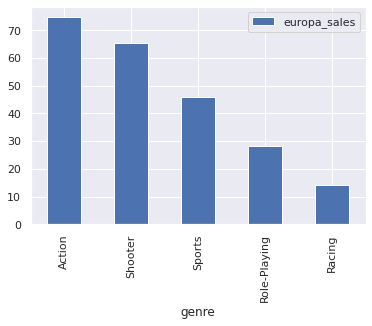

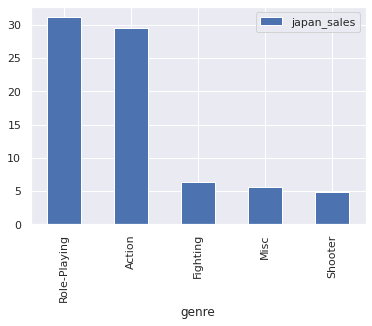

In [67]:
games_2013.groupby(by='genre').agg({'america_sales':'sum'}).sort_values(by='america_sales', ascending=False)\
.head(5).plot(kind='bar')
games_2013.groupby(by='genre').agg({'europa_sales':'sum'}).sort_values(by='europa_sales', ascending=False)\
.head(5).plot(kind='bar')
games_2013.groupby(by='genre').agg({'japan_sales':'sum'}).sort_values(by='japan_sales', ascending=False)\
.head(5).plot(kind='bar');

In [68]:
games_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   america_sales    1689 non-null   float64
 5   europa_sales     1689 non-null   float64
 6   japan_sales      1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     1689 non-null   int64  
 9   user_score       1689 non-null   float64
 10  rating_type      1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 236.1+ KB


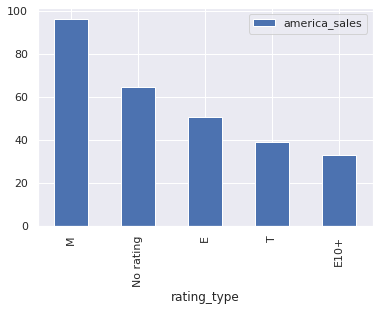

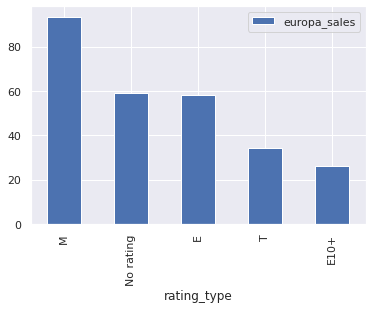

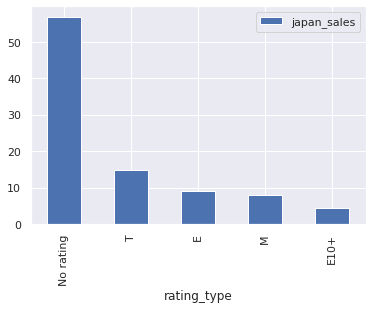

In [69]:
# Определим для пользователя каждого региона (NA, EU, JP):
# Влияет ли рейтинг ESRB на продажи в отдельном регионе?
games_2013.groupby(by='rating_type').agg({'america_sales':'sum'}).sort_values(by='america_sales', ascending=False)\
.head(5).plot(kind='bar')
games_2013.groupby(by='rating_type').agg({'europa_sales':'sum'}).sort_values(by='europa_sales', ascending=False)\
.head(5).plot(kind='bar')
games_2013.groupby(by='rating_type').agg({'japan_sales':'sum'}).sort_values(by='japan_sales', ascending=False)\
.head(5).plot(kind='bar');

Для Северной Америки и Европы наибольшей популярностью пользуются игры 17+, для взрослых и старших подростков. В Японии первое место занимают подростковые игры, от 13 лет и старше. В Японии свой рейтинг.

Вывод по 4 разделу. 

Самые популярные платформы в Америке и Европе это PlayStation PS4 и X-Box. Для Японии это портативная консоль 3DS
Самые популярные жанры в Америке и Европе это Action, Shooter, Sport. Для Японии это Role-Playing.
Рейтинг ESRB влияет на продажи в каждом регионе. В Америке и Европе ситуация по рейтингам схожая, а в Японии имеются различия, там больше продаются подростковые игры. 

### Проверка гипотез.
•	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

•	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [70]:
xone = games_2013.query('platform == "XOne" and user_score != -1')['user_score']
pc = games_2013.query('platform == "PC"and user_score != -1')['user_score']

alpha = .05

results = st.ttest_ind(
    xone, 
    pc, 
    equal_var=False)

print('p-значение:', results.pvalue.round(2))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")    

p-значение: 0.12
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Зададим пороговое значение alpha. Полученное p-значение не позволяет отвергнуть нулевую гипотезу и говорит о том, что "Средние пользовательские рейтинги платформ Xbox One и PC равны". С вероятностью в 55% такое различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между cредние пользовательскими рейтингами платформ Xbox One и PC (включая тех, кто не поставил рейтинг игре).

In [71]:
action = games_2013.query('genre == "Action" and user_score != -1')['user_score']
sports = games_2013.query('genre == "Sports" and user_score != -1')['user_score']

alpha = .05

results = st.ttest_ind(
    action, 
    sports, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


<div class="alert alert-block alert-info">
<b>🔄Выводы по разделу:</b> 
Полученное p-значение позволяет отвергнуть нулевую гипотезу и говорит о том, что "Средние пользовательские рейтинги жанров Action и Sports разные", рейтинг жанра Action выше, чем у жанра Sports.

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - гипотеза подтвердждена; 
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные - гипотеза подтверждена (точнее не смогли принять нулевую гипотезу, о том что они одинаковы).
</div>

### Общий вывод

В представленном отчете проведен исследовательский анализ данных. 
Первоначальные данные были проверены на пропуски, дубликаты и аномальные значения. В результате анализа данных о продажах игр, оценок пользователей и критиков, рейтинга организации ESRB, жанрах на актуальных платформах (PS4, XOne, PC, 3DS, WiiU и PSV) с 2013 по 2016 годы удалось обнаружить ряд закономерностей успешных игр, которые могут быть использованы в планировании рекламных кампаний на 2017 год.

Если говорить о всех регионах, то с наибольшей степенью вероятности успешная игра будет выпущена на платформе PlayStation 4, с меньшей, но достаточно высокой вероятностью на платформе Xbox One.
При этом существует региональная специфика. Если для Северной Америки и Европы предпочтение платформ сохраняется, то в случае Японии нужно ориентироваться на мобильные платформы, в первую очередь это Nintendo 3DS.

Самые популярные жанры в Америке и Европе это Action, Shooter, Sport. Для Японии самый популярный жанр Role-Playing, жанр Action популярен практически на таком же уровне.
Лучший рейтинг ESRB для игры в Америке и Европе - это М ("от 17 лет"). Для Японии больше покупают игры категорий Т("Подросткам 13—19 лет").